In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 少数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

<h1>数学的確率</h1>

In [2]:
# サイコロがとりうる値を配列に格納
dice_data = np.array([1, 2, 3, 4, 5, 6])

<h3>事象</h3>

In [3]:
# 引数は、対象データdice_dataから1つランダムに抽出するという意味
print(f'1つだけランダムに抽出: {np.random.choice(dice_data, 1)}')

1つだけランダムに抽出: [5]


<h1>統計的確率</h1>

In [4]:
# サイコロを1000回振ってみる
calc_steps = 1000

# 1~6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(f'{i}が出る確率 {p}')

1が出る確率 0.171
2が出る確率 0.158
3が出る確率 0.157
4が出る確率 0.183
5が出る確率 0.16
6が出る確率 0.171


<h1>様々な分布関数</h1>

<h3>一様分布</h3>

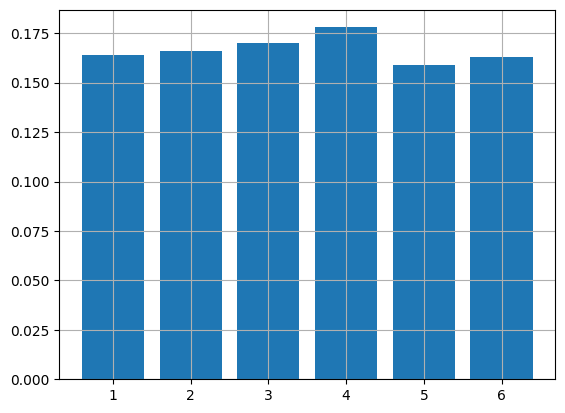

In [5]:
# 一様分布
# サイコロを1000回振ってみる
calc_steps = 1000

# 1~6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

<h3>ベルヌーイ分布</h3>

In [6]:
# ベルヌーイ分布
# 0:head(表)、1:tail(裏)と考える
# サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# uniqueで一意の値を抽出（ここの場合は、0と1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(f'{i}が出る確率 {p}')
    prob_be_data = np.append(prob_be_data, p)

0が出る確率 0.625
1が出る確率 0.375


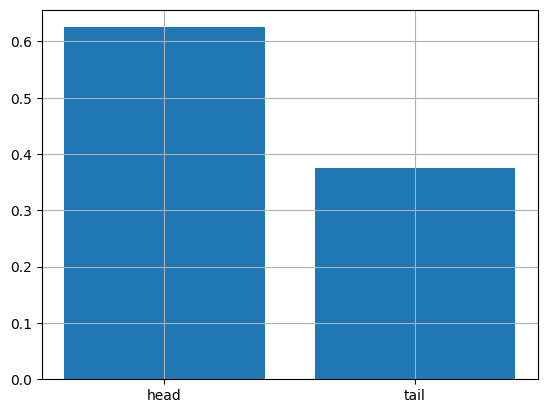

In [7]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

<h3>二項分布</h3>

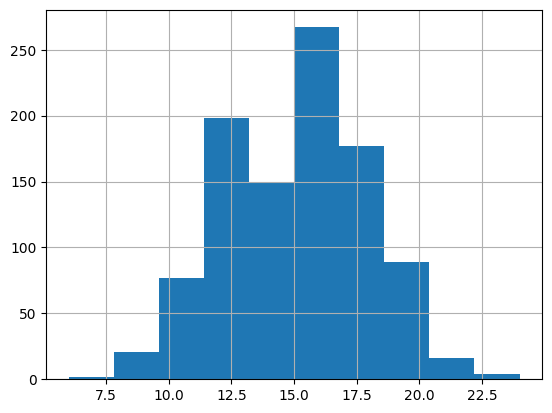

In [8]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

<h3>ポアソン分布</h3>

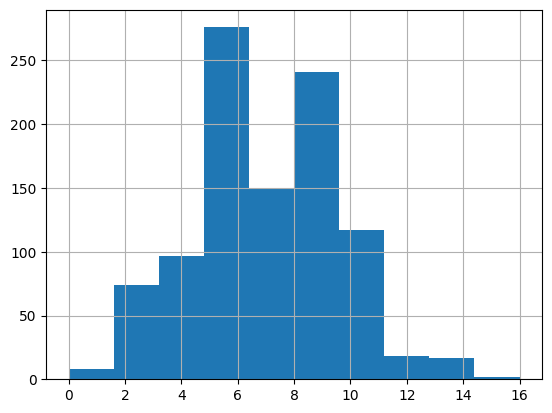

In [9]:
# ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

<h3>正規分布と対数正規分布</h3>

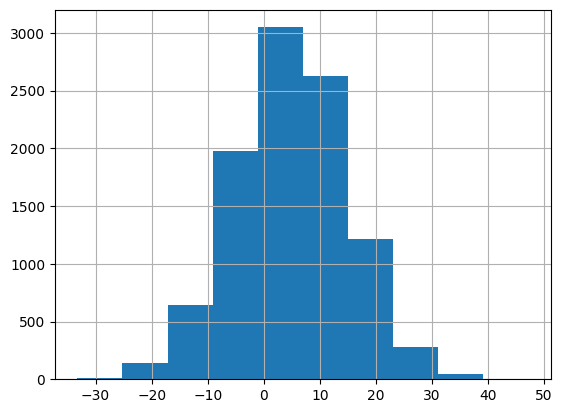

In [10]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

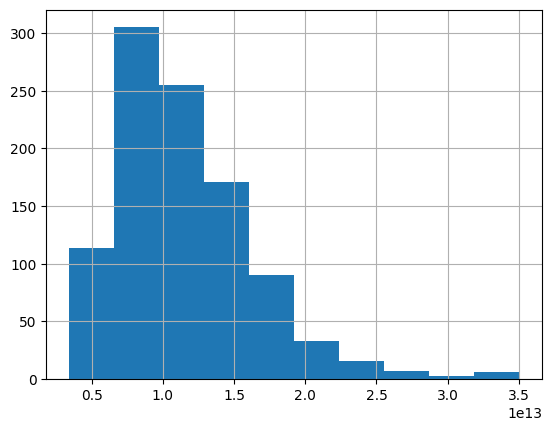

In [11]:
# 対数正規分布表
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

<h1>カーネル密度関数</h1>

In [12]:
pwd

'/Users/kuramotoyuuta/Documents/DataScience/Tokyo.unv/chapter_04'

In [13]:
mkdir chap04

mkdir: chap04: File exists


In [14]:
cd ./chap04

/Users/kuramotoyuuta/Documents/DataScience/Tokyo.unv/chapter_04/chap04


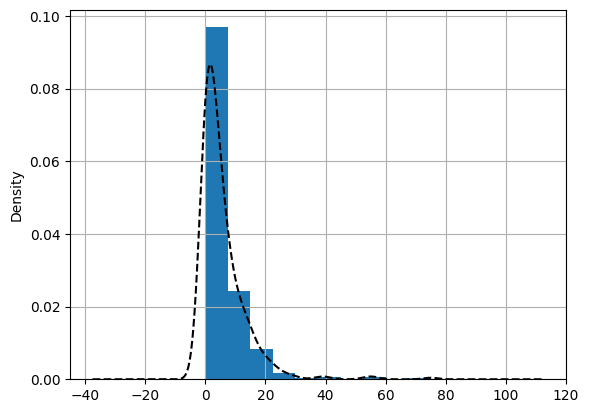

In [15]:
import requests, zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得する
r = requests.get(zip_file_url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# データを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density=Trueにすることで、確率を表示
student_data_math.absences.hist(density=True)
plt.grid(True)

<h1>多次元確率分布</h1>

<h3>２次元の正規分布をグラフで表示する</h3>

In [19]:
# 必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y

In [20]:
# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になる
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確率密度関数
z = rv.pdf(pos)

In [21]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x,y,zラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸の表示目盛り単位を変更、sciが指数表示、axisで軸を指定、scilimits=(n,m)はnからmの外にあるものは指数表記
# scilimits=(0,0)はすべて指数表記にするという意味
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

<Figure size 640x480 with 0 Axes>

<h1>大数の法則</h1>

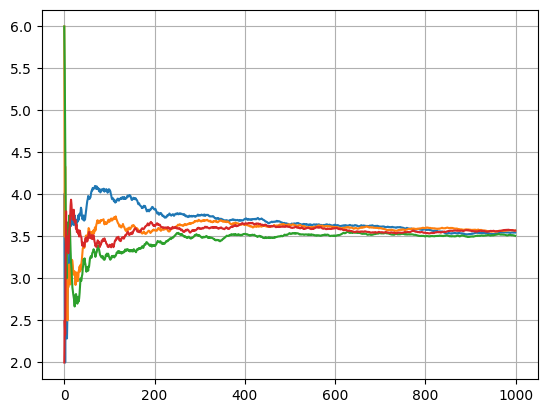

In [23]:
# 大数の法則
# 計算回数
calc_times = 1000
# サイコロ
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 4つのパスを生成
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

<h1>中心極限定理</h1>

In [24]:
# 中心極限定理
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    number_cnt = np.arange(1, N + 1) * 1.0

    mean_array = np.array([])

    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)

    plt.hist(mean_array)
    plt.grid(True)

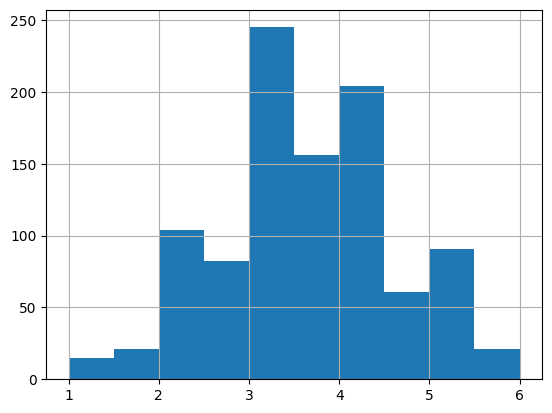

In [25]:
# N=3
function_central_theory(3)

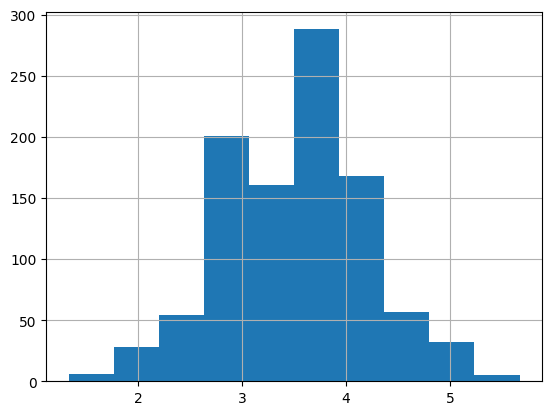

In [26]:
# N=6
function_central_theory(6)

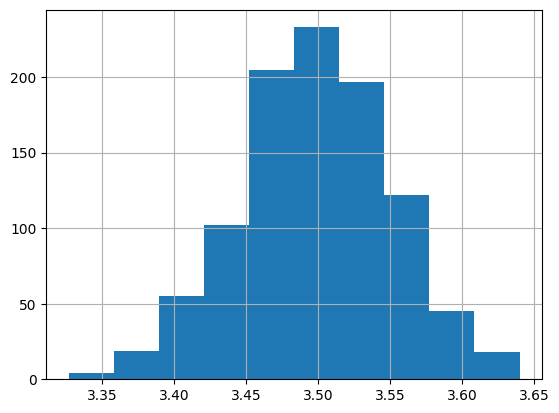

In [27]:
# N=10^3
function_central_theory(10**3)

<h1>標本分布</h1>

<h3>カイ二乗分布</h3>

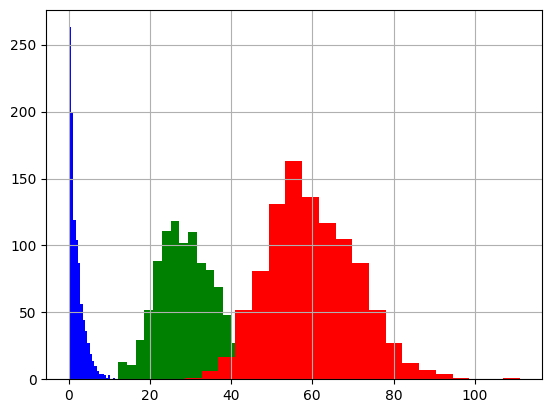

In [28]:
# カイ二乗分布
# 自由度2、10、60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2, 30, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

<h3>ステューデントt分布</h3>

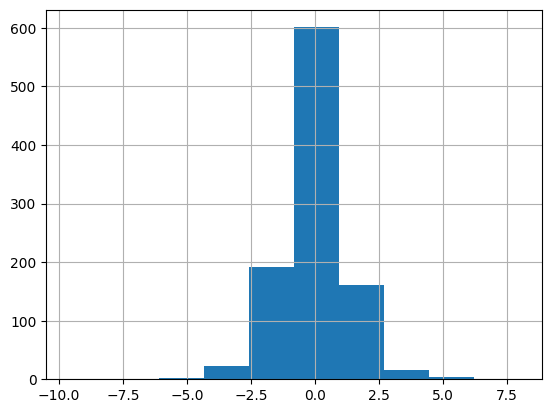

In [29]:
# t分布
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

<h3>F分布</h3>

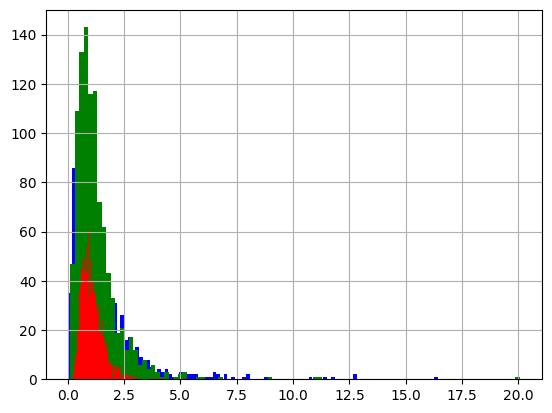

In [30]:
# f分布
for df, c in zip([(6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

<h1>統計的検定</h1>

In [31]:
# 数学のデータを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# ポルトガル語のデータを読み込む
student_data_por = pd.read_csv('student-por.csv', sep=';')

# マージする
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                    , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                                    , suffixes=('_math', '_por'))

print(f'G1 数学の成績平均：{student_data_merge.G1_math.mean()}')
print(f'G1 ポルトガル語の成績平均：{student_data_merge.G1_por.mean()}')

G1 数学の成績平均：10.861256544502618
G1 ポルトガル語の成績平均：12.112565445026178


In [32]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print(f'p値 = {p}')

p値 = 1.6536555217101024e-16
